In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Task2-SearchTask/AllQuantifiedPeptides.tsv', sep='\t')

In [3]:
df.head()

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_D19_15um30cm_SC1-calib,Intensity_D19_15um30cm_SC2-calib,Intensity_D19_15um30cm_SC3-calib,Intensity_D19_15um30cm_SC4-calib,Intensity_D19_15um30cm_SC5-calib,Detection Type_D19_15um30cm_SC1-calib,Detection Type_D19_15um30cm_SC2-calib,Detection Type_D19_15um30cm_SC3-calib,Detection Type_D19_15um30cm_SC4-calib,Detection Type_D19_15um30cm_SC5-calib,Unnamed: 15
0,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,P37108,SRP14,Homo sapiens,7791.749072,6305.879752,4890.219719,8774.817262,8557.505738,MSMS,MSMS,MSMS,MBR,MSMS,NaN
1,AAAAAAALQAK,AAAAAAALQAK,P36578,RPL4,Homo sapiens,6907.412903,7821.777883,11445.404524,6935.589448,8580.223295,MSMS,MSMS,MSMS,MSMS,MSMS,NaN
2,AAAFEEQENETVVVK,AAAFEEQENETVVVK,Q9Y490,TLN1,Homo sapiens,12578.757924,5189.689069,8789.710820,17953.413137,9582.254718,MBR,MBR,MSMS,MSMS,MBR,NaN
3,AAAGAVGLER,AAAGAVGLER,O95238,SPDEF,Homo sapiens,8442.804957,7023.240440,9021.512839,6583.397703,5116.746037,MBR,MBR,MSMS,MBR,MSMS,NaN
4,AAAIGIDLGTTYSC[Common Fixed:Carbamidomethyl on...,AAAIGIDLGTTYSCVGVFQHGK,P0DMV8|P0DMV9,HSPA1A|HSPA1B,Homo sapiens,4711.876748,4288.713849,1551.338234,5333.081156,2500.019271,MBR,MBR,MBR,MBR,MSMS,NaN


In [ ]:
# we need to get the PGM1 protein and see if it's kind of looking the same. 

In [4]:
#how many proteins are there total?
df = df[['Gene Names','Sequence',
         'Intensity_D19_15um30cm_SC1-calib', 
         'Intensity_D19_15um30cm_SC2-calib',
         'Intensity_D19_15um30cm_SC3-calib', 
         'Intensity_D19_15um30cm_SC4-calib',
         'Intensity_D19_15um30cm_SC5-calib'
   ]]


In [5]:
#Calculates the total spectral count for each row. Will help to find examples
def calc_totals(row):
    total = 0
    if row[2] != 0:
        total += 1
    if row[3] != 0:
        total += 1
    if row[4] != 0:
        total += 1
    if row[5] != 0:
        total += 1
    if row[6] != 0:
        total += 1  

    return total


df_with_totals = df.copy()
df_with_totals['Total_Count'] = df_with_totals.apply(calc_totals, axis = 1)



In [6]:
df_gene_ind = df_with_totals.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
df_gene_ind = df_gene_ind[df_gene_ind['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
df_gene_ind.sort_index()

Intensity_D19_15um30cm_SC1-calib  \
Gene Names Sequence                                                                               
A2M        AIGYLNTGYQR                                                                 0.000000   
           DTVIKPLLVEPEGLEK                                                            0.000000   
           QQNAQGGFSSTQDTVVALHALSK                                                     0.000000   
           VTAAPQSVC[Common Fixed:Carbamidomethyl on C]ALR                             0.000000   
           YGAATFTR                                                                    0.000000   
...                                                                                         ...   
NaN        YGLAAAVFTR                                                               2985.957098   
           YIHLENLLAR                                                               8892.290255   
           YNIPHGPVVGSTR                                                            2398.286266   
           YQEEFEHFQQELDKK                                                          3559.294560   
           YWPQEAGEYAVHVLC[Common Fixed:Carbamidomethyl on...                          0.000000   

                                                               Intensity_D19_15um30cm_SC2-calib  \
Gene Names Sequence                                                                               
A2M        AIGYLNTGYQR                                                                 0.000000   
           DTVIKPLLVEPEGLEK                                                            0.000000   
           QQNAQGGFSSTQDTVVALHALSK                                                     0.000000   
           VTAAPQSVC[Common Fixed:Carbamidomethyl on C]ALR                             0.000000   
           YGAATFTR                                                                    0.000000   
...                                                                                         ...   
NaN        YGLAAAVFTR                                                                  0.000000   
           YIHLENLLAR                                                               2986.679008   
           YNIPHGPVVGSTR                                                            2801.581951   
           YQEEFEHFQQELDKK                                                             0.000000   
           YWPQEAGEYAVHVLC[Common Fixed:Carbamidomethyl on...                          0.000000   

                                                               Intensity_D19_15um30cm_SC3-calib  \
Gene Names Sequence                                                                               
A2M        AIGYLNTGYQR                                                                 0.000000   
           DTVIKPLLVEPEGLEK                                                            0.000000   
           QQNAQGGFSSTQDTVVALHALSK                                                  1574.554445   
           VTAAPQSVC[Common Fixed:Carbamidomethyl on C]ALR                             0.000000   
           YGAATFTR                                                                    0.000000   
...                                                                                         ...   
NaN        YGLAAAVFTR                                                               3323.106142   
           YIHLENLLAR                                                               1814.771445   
           YNIPHGPVVGSTR                                                            2523.183391   
           YQEEFEHFQQELDKK                                                          5294.397099   
           YWPQEAGEYAVHVLC[Common Fixed:Carbamidomethyl on...                       7083.788076   

                                                               Intensity_D19_15um30cm_SC4-calib  \
Gene Names Sequence                                                                               
A

In [39]:
len(list(df_gene_ind.index.get_level_values('Gene Names').unique()))

1539

In [38]:
len(list(df_gene_ind.index.get_level_values('Sequence')))

5475

In [9]:
no_consistent= []
one_consistent = []
two_consistent = []
three_consistent = []
four_consistent = []
five_consistent = []

for gene, gene_df in df_gene_ind.groupby(level=0):
    #loop through each gene and count the number of consistent peptides
    if len(gene_df[gene_df['Total_Count'] == 5]) == 0:
        no_consistent.append(gene)
    if len(gene_df[gene_df['Total_Count'] == 5]) == 1:
        one_consistent.append(gene)
    if len(gene_df[gene_df['Total_Count'] == 5]) == 2:
#         import pdb; pdb.set_trace()
        two_consistent.append(gene)
    if len(gene_df[gene_df['Total_Count'] == 5]) == 3:
        three_consistent.append(gene)
    if len(gene_df[gene_df['Total_Count'] == 5]) == 4:
        four_consistent.append(gene)
    if len(gene_df[gene_df['Total_Count'] == 5]) == 5:
        five_consistent.append(gene)



In [10]:
one_consistent



['ACAA2',
 'ACAT1',
 'ACP1',
 'ACSL3',
 'ACTA2|ACTG2|ACTC1|ACTA1',
 'ACTA2|ACTG2|ACTC1|ACTA1;',
 'ACTB|ACTG1;POTEE;',
 'ACTN1;',
 'ACTR2',
 'ACTR3;',
 'ADRM1',
 'ADSL;',
 'ADSS2',
 'AGAP2',
 'AHNAK2',
 'AKR1B1',
 'AKR1B1;',
 'AKR1C3;AKR1C2',
 'ALDH7A1',
 'ALDOC',
 'ALYREF;',
 'ANKRD30A',
 'ANP32A',
 'ANP32A;',
 'ANP32E',
 'ANXA3',
 'ANXA5;',
 'ANXA7',
 'AP2B1;',
 'APEX1',
 'ARCN1',
 'ARCN1;',
 'ARF4',
 'ARF4;ARF5',
 'ARF5',
 'ARF5;',
 'ARHGDIA;',
 'ARL1;',
 'ARPC1A',
 'ARPC1B',
 'ARPC2',
 'ARPC3',
 'ARPC5',
 'ATAD3B;',
 'ATP1A1;',
 'ATP2A2',
 'ATP5F1B;',
 'ATP5F1E|ATP5F1EP2;',
 'ATP5PF;',
 'ATP5PO',
 'ATP6V1A',
 'ATP6V1A;',
 'B2M',
 'B2M;',
 'BAG2;',
 'BANF1',
 'BCAP31;',
 'BCLAF1;',
 'BSG;',
 'BST2',
 'BTF3',
 'BZW1',
 'C1QBP',
 'CACYBP;',
 'CAD;CPS1;',
 'CALD1;',
 'CALM1|CALM2|CALM3',
 'CALM1|CALM2|CALM3;',
 'CAPG',
 'CAPNS1;',
 'CAPRIN1',
 'CAPZB',
 'CAPZB;',
 'CARHSP1',
 'CAT',
 'CBR1;',
 'CBX5|CBX3',
 'CCDC124;',
 'CCT2;',
 'CCT4;',
 'CCT5;',
 'CCT6A;',
 'CCT8;',
 'CD44;',
 'CDC37

In [8]:
'''
returns a dictionary where the key is the number of peptides, 
and the value is the number of proteins
Example: 5:4 would mean that 4 proteins consist of 5 peptides
'''
def get_num_pep_dict(df_with_totals, pep_consistency_list):
    subdf = df_with_totals[df_with_totals['Gene Names'].isin(pep_consistency_list)]
    subdf = subdf.set_index(['Gene Names', 'Sequence']) #create a multiindex dataframe
    subdf = subdf[subdf['Total_Count']>0]#drop rows that don't have any intensities in any col. Who knows why that's a thing
    subdf = subdf.sort_index()
    
    
    num_pep_consis = {}
    for gene, gene_df in subdf.groupby(level=0):
        num_peptides = len(gene_df)
        if num_peptides not in num_pep_consis.keys():    
            num_pep_consis[num_peptides] = 1
        else:
            num_pep_consis[num_peptides] += 1

    return num_pep_consis    

In [9]:
no_consis_d = get_num_pep_dict(df_with_totals, no_consistent)
one_consis_d = get_num_pep_dict(df_with_totals, one_consistent)
two_consis_d = get_num_pep_dict(df_with_totals, two_consistent)
three_consis_d = get_num_pep_dict(df_with_totals, three_consistent)
four_consis_d = get_num_pep_dict(df_with_totals, four_consistent)
five_consis_d = get_num_pep_dict(df_with_totals, five_consistent)

In [10]:
no_consis_d

{5: 4, 2: 62, 1: 327, 3: 24, 6: 4, 4: 8, 7: 2, 9: 2, 12: 1, 8: 1}

In [47]:
#most of the ones that only have two consistent peptides don't also have consistent peptides


## make figure

In [68]:
#making a figure that looks like the one we did for ryan

In [11]:
num_pep_0consis_series = pd.Series(no_consis_d)
num_pep_1consis_series = pd.Series(one_consis_d)
num_pep_2consis_series = pd.Series(two_consis_d)
num_pep_3consis_series = pd.Series(three_consis_d)
num_pep_4consis_series = pd.Series(four_consis_d)
num_pep_5consis_series = pd.Series(five_consis_d)

In [12]:
plotdf = pd.concat([num_pep_0consis_series,
           num_pep_1consis_series,
          num_pep_2consis_series,
          num_pep_3consis_series,
          num_pep_4consis_series,
          num_pep_5consis_series],axis=1)

plotdf.rename({0:'0 consistent peptide',
              1:'1 consistent peptide',
              2:'2 consistent peptide',
              3:'3 consistent peptide',
              4:'4 consistent peptide',
              5:'5 consistent peptide'}, axis=1, inplace=True)

plotdf = plotdf.sort_index()

In [13]:
plotdf #index is the number of peptides in a protein. Values are the number of proteins

,0 consistent peptide,1 consistent peptide,2 consistent peptide,3 consistent peptide,4 consistent peptide,5 consistent peptide
1,327.0,377.0,NaN,NaN,NaN,NaN
2,62.0,116.0,97.0,NaN,NaN,NaN
3,24.0,35.0,61.0,44.0,NaN,NaN
4,8.0,14.0,30.0,33.0,19.0,NaN
5,4.0,6.0,9.0,18.0,14.0,11.0
6,4.0,8.0,4.0,9.0,18.0,12.0
7,2.0,3.0,2.0,3.0,10.0,6.0
8,1.0,1.0,2.0,1.0,6.0,3.0
9,2.0,1.0,1.0,NaN,3.0,1.0
10,NaN,NaN,1.0,2.0,1.0,1.0


In [14]:
plot_dfnew = plotdf.reset_index()

In [15]:
melted = pd.melt(plot_dfnew, id_vars='index', value_vars=plotdf.columns.tolist())
melted.rename({'variable':'category', 'index':'total_peptides', 'value':'num_proteins'}, axis=1, inplace=True)
melted = melted[melted['num_proteins'].notnull()]
melted.head()

,total_peptides,category,num_proteins
0,1,0 consistent peptide,327.0
1,2,0 consistent peptide,62.0
2,3,0 consistent peptide,24.0
3,4,0 consistent peptide,8.0
4,5,0 consistent peptide,4.0


In [20]:
# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot3 = melted.copy()

def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot3 = melted.copy()
plot3['inconsistent_count'] = plot3.apply(get_inconsistent_count, axis=1)
plot3 = plot3.sort_values('category')

#drop outliers
plot3 = plot3[plot3['inconsistent_count'] <10]
plot3.head()

# plot3 = plot3.loc[plot3.index.repeat(plot3.pop('num_proteins'))]
# plot3.index = plot3.index.astype(str) + '_' + plot3.groupby(level=0).cumcount().add(1).astype(str)

# plot3.set_index('category', inplace=True)

#columns are categories (tacks)
#index is inconsistent count (x axis)
#
plot3.drop(columns='total_peptides', inplace=True)

plot3 = plot3.groupby(['inconsistent_count', 'category'])['num_proteins'].sum().unstack().fillna(0)
plot3

category,0 consistent peptide,1 consistent peptide,2 consistent peptide,3 consistent peptide,4 consistent peptide,5 consistent peptide
inconsistent_count,,,,,,
0,0.0,377.0,97.0,44.0,19.0,11.0
1,327.0,116.0,61.0,33.0,14.0,12.0
2,62.0,35.0,30.0,18.0,18.0,6.0
3,24.0,14.0,9.0,9.0,10.0,3.0
4,8.0,6.0,4.0,3.0,6.0,1.0
5,4.0,8.0,2.0,1.0,3.0,1.0
6,4.0,3.0,2.0,0.0,1.0,0.0
7,2.0,1.0,1.0,2.0,0.0,0.0
8,1.0,1.0,1.0,0.0,1.0,0.0


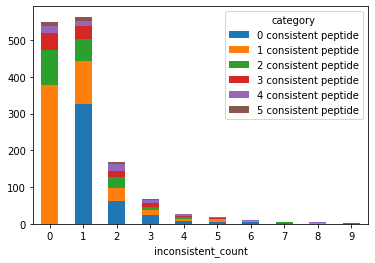

In [23]:
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
plot3.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
# plt.title('Tips by Day and Gender')
plt.xticks(rotation=0, ha='center')

plt.show()

In [25]:
# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot4 = melted.copy()

def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot4 = melted.copy()
plot4['inconsistent_count'] = plot4.apply(get_inconsistent_count, axis=1)
plot4 = plot4.sort_values('category')

#drop outliers
plot4 = plot4[plot4['inconsistent_count'] <10]
plot4.head()

plot4.drop(columns='total_peptides', inplace=True)

plot4 = plot4.groupby(['category', 'inconsistent_count'])['num_proteins'].sum().unstack().fillna(0)
plot4

inconsistent_count,0,1,2,3,4,5,6,7,8,9
category,,,,,,,,,,
0 consistent peptide,0.0,327.0,62.0,24.0,8.0,4.0,4.0,2.0,1.0,2.0
1 consistent peptide,377.0,116.0,35.0,14.0,6.0,8.0,3.0,1.0,1.0,0.0
2 consistent peptide,97.0,61.0,30.0,9.0,4.0,2.0,2.0,1.0,1.0,0.0
3 consistent peptide,44.0,33.0,18.0,9.0,3.0,1.0,0.0,2.0,0.0,0.0
4 consistent peptide,19.0,14.0,18.0,10.0,6.0,3.0,1.0,0.0,1.0,1.0
5 consistent peptide,11.0,12.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0


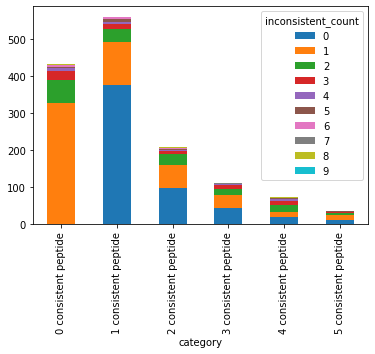

In [28]:
from matplotlib import pyplot as plt

# Very simple one-liner using our agg_tips DataFrame.
plot4.plot(kind='bar', stacked=True)

# Just add a title and rotate the x-axis labels to be horizontal.
# plt.title('Tips by Day and Gender')
# plt.xticks(rotation=0, ha='center')

plt.show()

In [262]:
# make a boxplot
#each row is a protein
#y axis is the number of inconsistent
#x axis is the category

plot2 = melted.copy()

def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot2 = melted.copy()
plot2['inconsistent_count'] = plot2.apply(get_inconsistent_count, axis=1)
plot2 = plot2.sort_values('category')

#drop outliers
plot2 = plot2[plot2['inconsistent_count'] <10]
plot2.head()


# plot2 = plot2.set_index('num_proteins')
plot2 = plot2.loc[plot2.index.repeat(plot2.pop('num_proteins'))]
plot2.index = plot2.index.astype(str) + '_' + plot2.groupby(level=0).cumcount().add(1).astype(str)
# df1 = df1.reset_index(drop=True)
plot2

,total_peptides,category,inconsistent_count
0_1,1,0 consistent peptide,1
0_2,1,0 consistent peptide,1
0_3,1,0 consistent peptide,1
0_4,1,0 consistent peptide,1
0_5,1,0 consistent peptide,1
...,...,...,...
76_6,7,5 consistent peptide,2
77_1,8,5 consistent peptide,3
77_2,8,5 consistent peptide,3
77_3,8,5 consistent peptide,3


<AxesSubplot:xlabel='category', ylabel='inconsistent_count'>

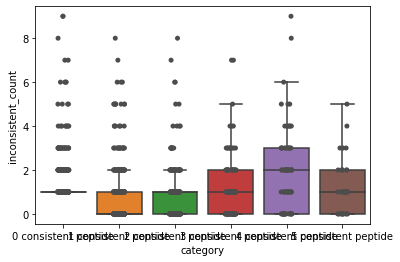

In [267]:
sns.boxplot(data=plot2, x='category', y='inconsistent_count',
            showfliers=False)

sns.stripplot(data=plot2, x='category', y='inconsistent_count', color='.3')

In [260]:
plot2['num_proteins'].sum()

1422.0

In [ ]:
#let's look at two thing:
# how many inconsistent peptides are present
#we also need something that preserves the categories

In [240]:
def get_inconsistent_count(row):
    num_consistent = int(row['category'].split(' ')[0])
    num_total = row['total_peptides']
    if num_consistent == num_total:
        return 0
    else:
        num_inconsistent  = num_total - num_consistent
        return num_inconsistent
    
plot1 = melted.copy()
plot1['inconsistent_count'] = plot1.apply(get_inconsistent_count, axis=1)
plot1 = plot1.sort_values('category')

#drop outliers
plot1 = plot1[plot1['inconsistent_count'] <10]
plot1.head()

,total_peptides,category,num_proteins,inconsistent_count
0,1,0 consistent peptide,327.0,1
1,2,0 consistent peptide,62.0,2
2,3,0 consistent peptide,24.0,3
3,4,0 consistent peptide,8.0,4
4,5,0 consistent peptide,4.0,5


In [241]:
plot1['inconsistent_count'].value_counts()

1    6
2    6
3    6
4    6
5    6
0    5
6    4
7    4
8    4
9    2
Name: inconsistent_count, dtype: int64

In [219]:
#want a graph that will give me number of proteins on y, and inconsistent count on x
#count plot doesn't like getting both x and y 
#hist won't work. . . unless I explode the df? blagh.
#I don't want a lineplot
#

In [236]:
sorted(plot1['inconsistent_count'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 31]

<AxesSubplot:xlabel='inconsistent_count', ylabel='num_proteins'>

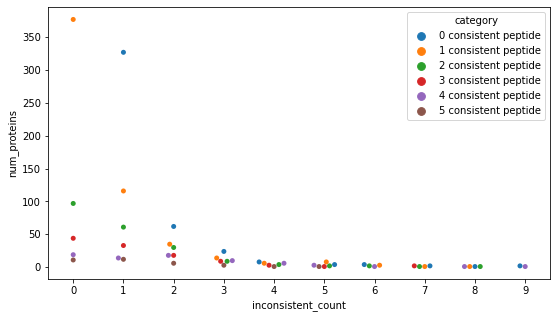

In [254]:
plt.figure(figsize=(9,5))

sns.swarmplot(data=plot1, x="inconsistent_count", y = 'num_proteins', hue='category', 
           order =sorted(plot1['inconsistent_count'].unique()) )



<Figure size 1008x360 with 0 Axes>

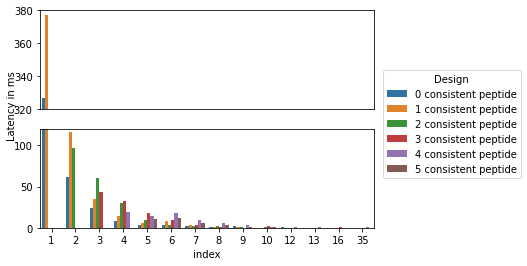

In [132]:
plt.figure(figsize=(14,5))

f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,
                             sharex=True)

ax1 = sns.barplot(data=barplotdf, x="index", y="value", hue = 'variable', ax=ax1)
ax2 = sns.barplot(data=barplotdf, x="index", y="value", hue = 'variable', ax=ax2)

ax1.set_ylim(320, 380)
ax2.set_ylim(0, 120)

ax1.get_xaxis().set_visible(False)


ax1.set_ylabel("")
ax2.set_ylabel("")
# then, set a new label on the plot (basically just a piece of text) and move it to where it makes sense (requires trial and error)
f.text(0.05, 0.55, "Latency in ms", va="center", rotation="vertical")

ax1.get_legend().remove()
ax2.get_legend().remove()
# then create a new legend and put it to the side of the figure (also requires trial and error)
ax2.legend(loc=(1.025, 0.5), title="Design")


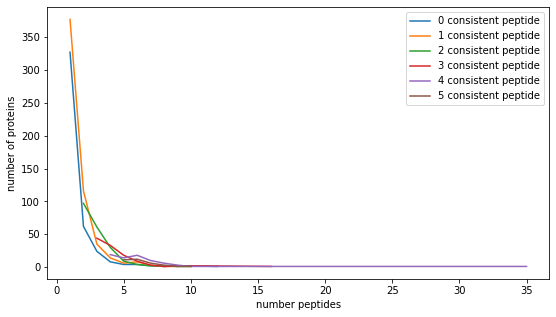

In [105]:
plt.figure(figsize=(9,5))

fig = sns.lineplot(data=plotdf, dashes=False)
plt.ylabel('number of proteins')
plt.xlabel('number peptides')
plt.show()

In [141]:
barplotdf

,index,variable,value
0,1,0 consistent peptide,327.0
1,2,0 consistent peptide,62.0
2,3,0 consistent peptide,24.0
3,4,0 consistent peptide,8.0
4,5,0 consistent peptide,4.0
...,...,...,...
79,10,5 consistent peptide,1.0
80,12,5 consistent peptide,NaN
81,13,5 consistent peptide,NaN
82,16,5 consistent peptide,NaN


In [155]:
barplotdf['inconsistent_count'].unique()


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 35,
       'only consistent peptides', 11, 15, 34, -1, 14, 33, -2, 32, -3, 31,
       -4, 30], dtype=object)

In [ ]:
# why are there negative values? it's cause you're giving things crummy variable names. 

In [156]:
barplotdf[barplotdf['inconsistent_count'] == -1]

,index,variable,value,inconsistent_count
28,1,2 consistent peptide,NaN,-1
43,2,3 consistent peptide,NaN,-1
58,3,4 consistent peptide,NaN,-1
73,4,5 consistent peptide,NaN,-1


<AxesSubplot:xlabel='inconsistent_count', ylabel='Count'>

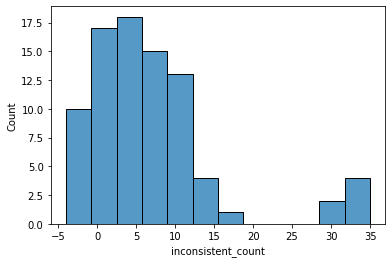

In [ ]:
plotdf = pd

In [ ]:
df_gene_ind.loc[['PGM1']]